In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog

In [3]:
#contour segmentation

In [7]:
def contour_segmentation(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print("Error: Unable to load image.")
        return
    
    # Apply binary thresholding
    _, thresholded = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    
    return img, contour_image

In [9]:
#edge segementation

In [11]:
def edge_segmentation_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print("Error: Unable to load image.")
        return
    
    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)
    
    return img, edges

In [13]:
#apply threshold

In [15]:
def highlight_bright_regions(image):
    # Apply a fixed threshold to highlight bright regions
    threshold_value = 180  # Adjusted for better visibility
    _, binary_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Refine the mask using morphological operations
    kernel = np.ones((5, 5), np.uint8)  # Increased kernel size for better visibility
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Convert grayscale image to BGR for color overlay
    img_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    # Create a red mask from the binary mask
    red_mask = np.zeros_like(img_color)
    red_mask[:, :, 2] = cv2.addWeighted(binary_mask, 1.5, binary_mask, 0, 0)  # Increased intensity for visibility

    # Blend the original image with the red mask
    alpha = 0.6  # Increased transparency factor
    overlay_img = cv2.addWeighted(img_color, 1.0, red_mask, alpha, 0)
    
    return binary_mask, overlay_img

In [17]:
#upload and run

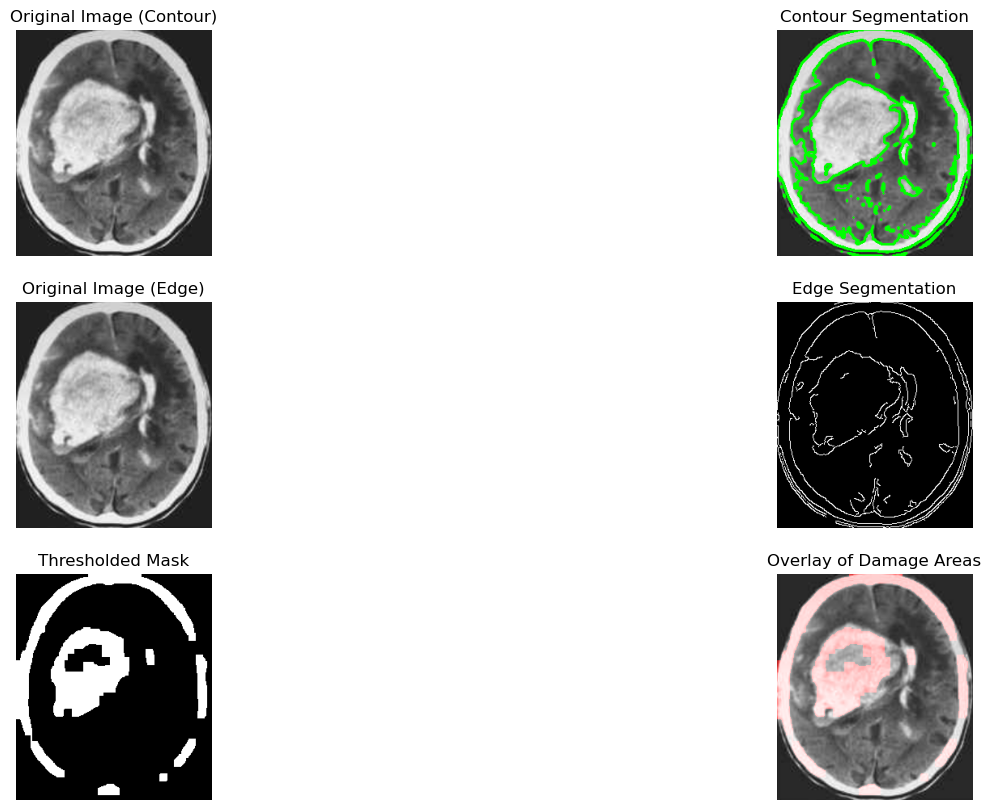

In [23]:
def upload_and_run():
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg;*.bmp;*.tiff")])
    
    if file_path:
        original_contour, contour_result = contour_segmentation(file_path)
        original_edge, edge_result = edge_segmentation_image(file_path)
        
        # Apply threshold-based highlighting
        binary_mask, overlay_img = highlight_bright_regions(original_contour)
        
        # Display the results
        plt.figure(figsize=(18, 10))  # Increased figure size for larger images
        plt.subplot(3, 2, 1)
        plt.title('Original Image (Contour)')
        plt.imshow(original_contour, cmap='gray')
        plt.axis('off')
        
        plt.subplot(3, 2, 2)
        plt.title('Contour Segmentation')
        plt.imshow(cv2.cvtColor(contour_result, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.subplot(3, 2, 3)
        plt.title('Original Image (Edge)')
        plt.imshow(original_edge, cmap='gray')
        plt.axis('off')
        
        plt.subplot(3, 2, 4)
        plt.title('Edge Segmentation')
        plt.imshow(edge_result, cmap='gray')
        plt.axis('off')
        
        plt.subplot(3, 2, 5)
        plt.title('Thresholded Mask')
        plt.imshow(binary_mask, cmap='gray')
        plt.axis('off')
        
        plt.subplot(3, 2, 6)
        plt.title('Overlay of Damage Areas')
        plt.imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        plt.show()
    else:
        print("No file selected.")

if __name__ == "__main__":
    upload_and_run()